## 1. import library and data ##

In [99]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
from collections import Counter  # label별 데이터 카운트를 위한 모듈

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 전처리 및 모델 성능평가 관련 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
####################################################################################

# scikit-learn 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공

from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.pipeline import *  # feature 처리 등의 변환과 ML 알고리즘 학습/예측 등을 함께 묶어서 실행하는 유틸리티 제공
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [60]:
dr = pd.read_csv("marketing_campaign.csv", sep = "\t")

In [61]:
df = dr
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [62]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2. EDA

In [63]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [64]:
# Object 형태의 Data 분포 확인 #
df1 = df.select_dtypes(exclude='float')
for c in df1.columns:
    print ("---- %s ---" % c)
    print (df1[c].value_counts())

---- ID ---
0       1
2831    1
1064    1
6798    1
3479    1
       ..
5376    1
4552    1
7419    1
5370    1
4094    1
Name: ID, Length: 2240, dtype: int64
---- Year_Birth ---
1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1973    74
1965    74
1969    71
1974    69
1956    55
1979    53
1958    53
1977    52
1952    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1963    45
1982    45
1967    44
1962    44
1951    43
1957    43
1986    42
1983    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1949    30
1989    30
1988    29
1950    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1943     7
1944     7
1995     5
1993     5
1994     3
1996     2
1900     1
1941     1
1899     1
1940     1
1893     1
Name: Year_Birth, dtype: int64
---- Education ---
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int

Column 별 조치사항  

ID, Z_CostContact, Z_Revenue - 삭제  
Year_Birth - 2021에서 빼기  
Education, Marital_Status - Categorize  
Dt_Customer - 뒤에 4자리만 남기기  
MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases - 90% 이상은 같은 수로 만들기

## 2.1 데이터 정리 ##

In [65]:
df = df.drop(["ID", "Z_CostContact", "Z_Revenue"], axis=1)
df["Year_Birth"] = 2021 - df["Year_Birth"]

df["Education"] = df["Education"].astype('category')
df["Marital_Status"] = df["Marital_Status"].astype('category')
# 순서형으로 바꾸는 법 고려 #
df["Start_yr"]  = df["Dt_Customer"].str[-4:]
df["Start_yr"] = df["Start_yr"].astype('int')
df = df.drop(["Dt_Customer"], axis=1)

df["MntWines"][df["MntWines"] > np.quantile(df["MntWines"],0.9)] = math.ceil(np.quantile(df["MntWines"],0.9))
df["MntFruits"][df["MntFruits"] > np.quantile(df["MntFruits"],0.9)] = math.ceil(np.quantile(df["MntFruits"],0.9))
df["MntMeatProducts"][df["MntMeatProducts"] > np.quantile(df["MntMeatProducts"],0.9)] = math.ceil(np.quantile(df["MntMeatProducts"],0.9))
df["MntFishProducts"][df["MntFishProducts"] > np.quantile(df["MntFishProducts"],0.9)] = math.ceil(np.quantile(df["MntFishProducts"],0.9))
df["MntSweetProducts"][df["MntSweetProducts"] > np.quantile(df["MntSweetProducts"],0.9)] = math.ceil(np.quantile(df["MntSweetProducts"],0.9))
df["MntGoldProds"][df["MntGoldProds"] > np.quantile(df["MntGoldProds"],0.9)] = math.ceil(np.quantile(df["MntGoldProds"],0.9))
df["NumDealsPurchases"][df["NumDealsPurchases"] > np.quantile(df["NumDealsPurchases"],0.9)] = math.ceil(np.quantile(df["NumDealsPurchases"],0.9))

<ipython-input-65-d99909669561>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MntWines"][df["MntWines"] > np.quantile(df["MntWines"],0.9)] = math.ceil(np.quantile(df["MntWines"],0.9))
<ipython-input-65-d99909669561>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MntFruits"][df["MntFruits"] > np.quantile(df["MntFruits"],0.9)] = math.ceil(np.quantile(df["MntFruits"],0.9))
<ipython-input-65-d99909669561>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

변수가 많아 pairplot 너무 오래 걸려서 검토 X

## 3.1 KNN Clustering  
## -> KNN은 지도학습에서만 가능?

In [71]:
# Def and Build Model by 민성님 Code #
def kmeans(k):
    cluster_kmeans = KMeans( n_clusters = k,
                             init = 'random',
                             max_iter = 500,
                             random_state = 0 )
    return cluster_kmeans

In [80]:
# 수치형 데이터만 남김 #
df_num = df.select_dtypes(exclude='category')
df_num = df_num.dropna()

< inertia by k >
k = 1 :  1403867293635.699
k = 2 :  674487880852.945
k = 3 :  528898281863.59436
k = 4 :  362786160959.24927
k = 5 :  307338523167.0883
k = 6 :  93635877853.34874
k = 7 :  53475288551.636856
k = 8 :  40480223572.74301
k = 9 :  31551505415.30731
k = 10 :  24150137788.47631


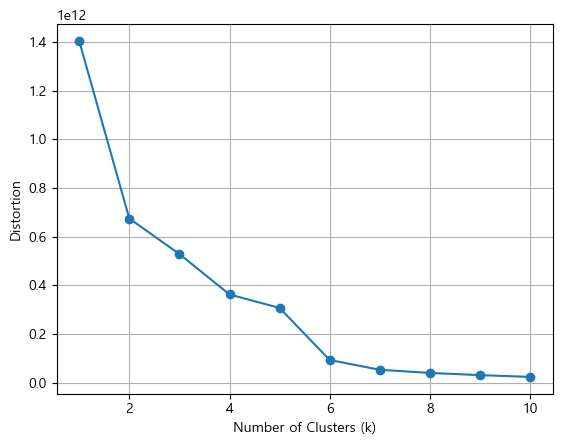

In [81]:
inertia = list()

print('< inertia by k >')
# k를 1부터 10까지 변화시켜가며 inertia를 측정
for k in range(1,11):
    model = kmeans(k).fit(df_num)
    inertia.append(model.inertia_)
    
    print( 'k =',k,': ', model.inertia_ )

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.grid()
plt.show()

knn은 수치형 데이터로만 가능  
학력은 ordinal이라 이를 0,1,2,...로 바꾸는 방안

In [84]:
# k를 6개로 설정하고 군집 모델 학습
model = kmeans(6)

model.fit(df_num)

# 각각의 클러스터의 중심 확인
print('< centers >')
print(model.cluster_centers_)
print()

# 분류된 군집화 값 확인
print('< labels >')
print(model.labels_)
print()

< centers >
[[4.97288136e+01 1.01289610e+05 6.77966102e-02 1.35593220e-01
  4.64576271e+01 5.96915254e+02 4.38813559e+01 3.66949153e+02
  7.11016949e+01 5.33728814e+01 5.30847458e+01 7.62711864e-01
  5.25423729e+00 6.77966102e+00 7.27118644e+00 1.96610169e+00
  6.77966102e-02 3.22033898e-01 6.61016949e-01 4.40677966e-01
  5.08474576e-02 1.73472348e-18 4.74576271e-01 2.01316949e+03]
 [5.19709208e+01 4.08235703e+04 7.04361874e-01 6.25201939e-01
  4.84717286e+01 1.04211632e+02 7.47819063e+00 4.37189015e+01
  1.20662359e+01 7.63651050e+00 2.44555735e+01 2.46688207e+00
  3.11793215e+00 1.02261712e+00 3.97899838e+00 6.42810985e+00
  9.04684976e-02 2.74636511e-02 1.38777878e-16 4.84652666e-03
  6.46203554e-03 1.45395800e-02 1.27625202e-01 2.01305977e+03]
 [5.58837607e+01 5.92125214e+04 2.56410256e-01 8.22222222e-01
  4.97521368e+01 3.94974359e+02 2.41760684e+01 1.45550427e+02
  3.30136752e+01 2.42256410e+01 5.07948718e+01 2.75384615e+00
  5.52478632e+00 3.13675214e+00 7.48888889e+00 5.0923076

군집화 결과

In [86]:
df_result = df_num.copy()
df_result.insert(1, 'km_cluster', model.labels_)
df_result

,Year_Birth,km_cluster,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Start_yr
0,64,2,58138.0,0,0,58,635,83,499,120,...,4,7,0,0,0,0,0,0,1,2012
1,67,1,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,2014
2,56,4,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,2013
3,37,3,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,2014
4,40,2,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,54,2,61223.0,0,1,46,709,43,182,42,...,4,5,0,0,0,0,0,0,0,2013
2236,75,2,64014.0,2,1,56,406,0,30,0,...,5,7,0,0,0,1,0,0,0,2014
2237,40,2,56981.0,0,0,91,823,48,217,32,...,13,6,0,1,0,0,0,0,0,2014
2238,65,4,69245.0,0,1,8,428,30,214,80,...,10,3,0,0,0,0,0,0,0,2014


In [87]:
display( df_result.groupby('km_cluster').count() )

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Start_yr
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
1,619,619,619,619,619,619,619,619,619,619,...,619,619,619,619,619,619,619,619,619,619
2,585,585,585,585,585,585,585,585,585,585,...,585,585,585,585,585,585,585,585,585,585
3,443,443,443,443,443,443,443,443,443,443,...,443,443,443,443,443,443,443,443,443,443
4,509,509,509,509,509,509,509,509,509,509,...,509,509,509,509,509,509,509,509,509,509
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## 3.2 계층적 군집 분석 

In [90]:
from sklearn import preprocessing
standard = preprocessing.scale(df_num)

In [96]:
scaler=MinMaxScaler()
scaler = scaler.fit(df_num[["Income"]])
scaledData=scaler.transform(df[["Income"]])
df_num["Income"] = pd.DataFrame(scaledData)

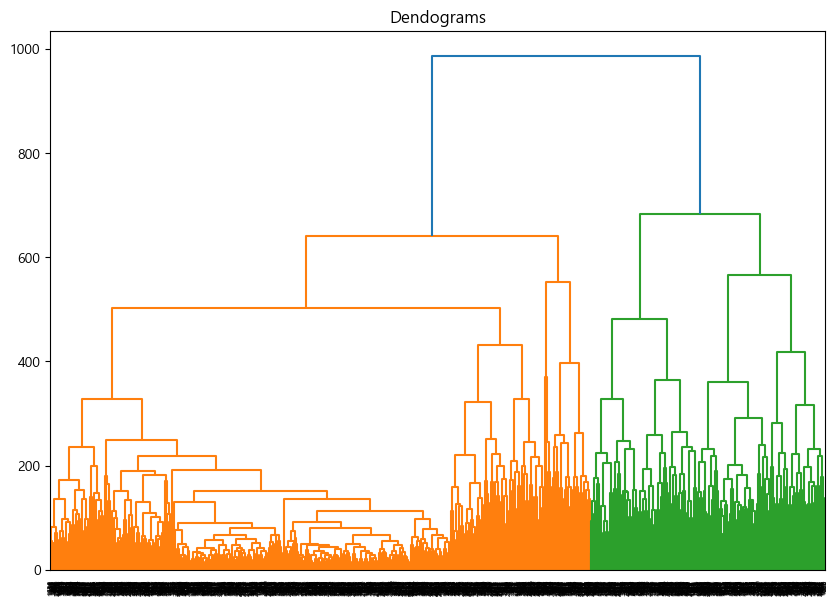

In [100]:
## using scipy cluster heirarchy raw dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(df_num, method='complete'))
# method 부분에 ward, single 등 입력 가능

In [101]:
Z = linkage(df_num, 'complete')
cluster = pd.DataFrame(fcluster(Z, 500, criterion = 'distance'))  #500 기준으로 수평선 그려서 그룹 설정
cluster.columns = ['cluster1']


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Start_yr,cluster1
0,64.0,0.084832,0.0,0.0,58.0,635.0,83.0,499.0,120.0,88.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2012.0,6.0
1,67.0,0.067095,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,1.0
2,56.0,0.105097,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,5.0
3,37.0,0.037471,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,1.0
4,40.0,0.085065,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,54.0,0.089472,0.0,1.0,46.0,709.0,43.0,182.0,42.0,89.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,NaN
2236,75.0,0.093669,2.0,1.0,56.0,406.0,0.0,30.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2014.0,NaN
2237,40.0,0.083092,0.0,0.0,91.0,823.0,48.0,217.0,32.0,12.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2014.0,NaN
2238,65.0,0.101536,0.0,1.0,8.0,428.0,30.0,214.0,80.0,30.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,NaN


In [106]:
result = pd.concat([df_num, cluster], axis=1)
result

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Start_yr,cluster1
0,64.0,0.084832,0.0,0.0,58.0,635.0,83.0,499.0,120.0,88.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2012.0,6.0
1,67.0,0.067095,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,1.0
2,56.0,0.105097,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,5.0
3,37.0,0.037471,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,1.0
4,40.0,0.085065,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,54.0,0.089472,0.0,1.0,46.0,709.0,43.0,182.0,42.0,89.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,NaN
2236,75.0,0.093669,2.0,1.0,56.0,406.0,0.0,30.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2014.0,NaN
2237,40.0,0.083092,0.0,0.0,91.0,823.0,48.0,217.0,32.0,12.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2014.0,NaN
2238,65.0,0.101536,0.0,1.0,8.0,428.0,30.0,214.0,80.0,30.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,NaN


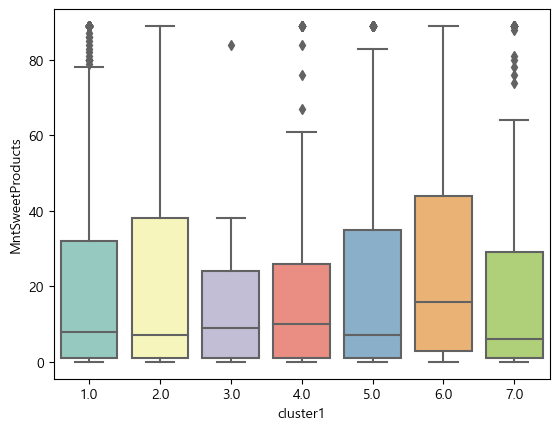

In [109]:
ax = sns.boxplot(x="cluster1", y="MntSweetProducts", 
                 data=result, palette="Set3")

In [ ]:
## groupby를 통해 수치로 각 그룹간 비교하기
print(result.groupby('cluster1')['AGE'].mean())
print(result.groupby('cluster1')['CRIM'].mean())

In [105]:
cluster.isna().sum()

cluster1    0
dtype: int64